# KNN算法详解

## 1. KNN算法代码

In [1]:
import pandas as pd
rowdata = {'颜色深度':[14.23,13.2,13.16,14.37,13.24,12.07,12.43,11.79,12.37,12.04],
          '酒精浓度':[5.64,4.38,5.68,4.80,4.32,2.76,3.94,3.  ,2.12,2.6 ],
          '品种':[0,0,0,0,0,1,1,1,1,1]}        

# 0 代表 “黑皮诺”，1 代表 “赤霞珠” 

wine_data = pd.DataFrame(rowdata)
wine_data

,颜色深度,酒精浓度,品种
0,14.23,5.64,0
1,13.20,4.38,0
2,13.16,5.68,0
3,14.37,4.80,0
4,13.24,4.32,0
5,12.07,2.76,1
6,12.43,3.94,1
7,11.79,3.00,1
8,12.37,2.12,1
9,12.04,2.60,1


### 1.1.超参数

KNN模型的几个超参数：Algorithm、n_neighbors、明科夫斯基距离，**超参数**和**模型参数**的区别如下：

* 超参数是在模型运行前确定的
* 模型参数是在算法运行过程自己学习的参数

#### 1.1.1. algorithm

algorithm用于设置kNN模型的算法，采用什么算法是搜索最近的k个点（kNN的核心思路是计算大量样本之间的距离），主要包含四个选项：

* brute（暴力搜索）：计算预测样本和全部训练样本之间的距离，最后筛选K个最近的样本，如果数据量比较大时，这种方法每个样本都需要遍历，很费时间效率低下。
* kd_tree（KD树）：K-dimension tree的缩写，它是一种「二叉树」结构，把整个空间划分为特定的几个子空间，然后在合适的子空间中去搜索待预测的样本点，这种方法不用遍历所有样本就可以找到最近的K个点，速度比暴力搜索快很多。**怎样的数据集合适用KD树**：如果样本数为m，特征数为n，当样本量大于 $ m^{2^n} $（指数是2的n次方） 时，用KD算法搜索比较好。特征过多会导致KD树的搜索效率大幅度下降，最终变得和暴力搜索差不多，通常情况不适合超过20维的数据集。
* ball_tree（球树）：对于一些分布不均匀的数据集，KD树算法搜索效率并不好，为了优化就产生了球树。
* auto（默认值，自动选择上述最快的）

> 由于参数为 auto 时，系统会自动选择算法，所以通常使用 auto 就可以了。

#### 1.2. n_neighbors

n_neighbors 即要选择最近几个点，默认值是5（等效k值），如果随机选择一个3，那么3建立的模型不一定是最好的。选择3时会出现一定的偏差，比如下图：

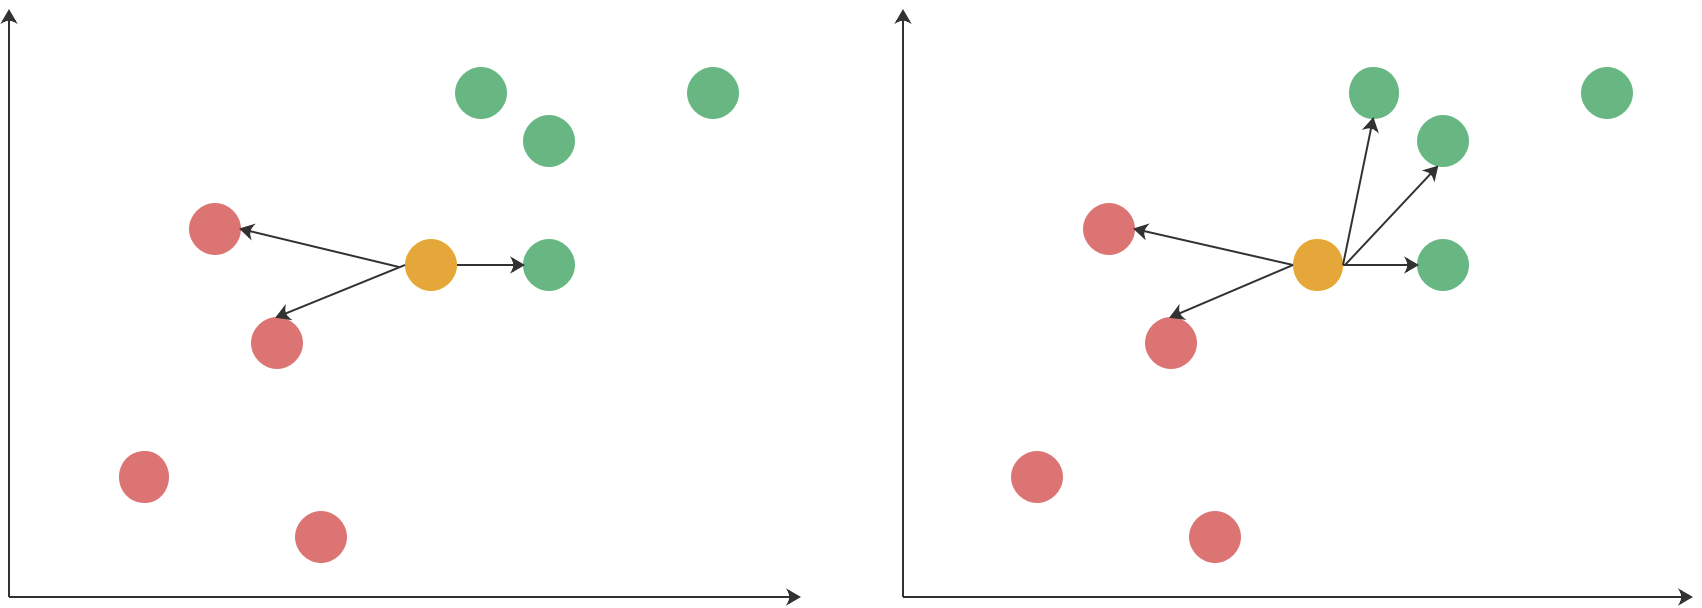

左边是 k = 3，右边是 k = 5，使用 kNN 时，k = 3 是红色，而 k = 5 是绿色，为了找到这个边界值，可直接写一段代码从 1 - 10 个样本查找，从最终结果中可以找到 k = 3 是一个测试过后的临界值。

#### 1.3. weights

上边左图计算出来的红绿点的比例是2:1，虽然红点多于绿色，但明显绿色更近，最终结果有可能并不符合我们的预期，所以建立模型时，有时候需要考虑距离，根据距离设置样本的权重，近的点权重大，反之小；——一般的计算方法可直接采用**倒数**法，最简单。

weights就是sklearn的kNN模型中考虑权重的超参数，它有两个选项：

* uniform：默认值，不考虑距离权重
* distance：考虑距离权重

如下图：

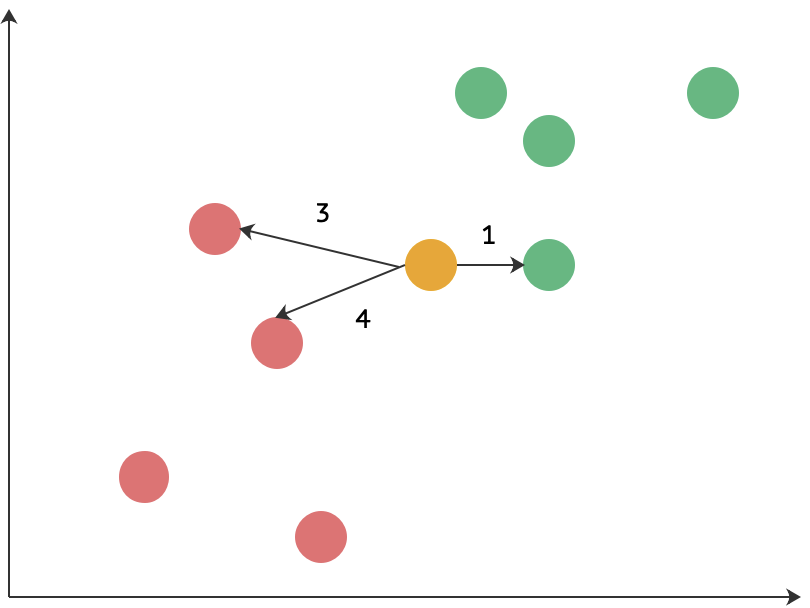

红点的距离是3和4，取倒数相加后为$ \frac{7}{12} $，而绿色距离是1，倒数为1，绿色大于红色。

#### 1.4. p

最后一个和距离相关的重要参数就是超参数p，之前模型在计算距离时使用的是欧拉距离：

$$ \sqrt{\sum_{i=1}^n ( X_i^{(a)} - X_i^{(b)})^2}    \to    (\sum_{i=1}^n ( X_i^{(a)} - X_i^{(b)})^2)^{\frac{1}{2}} $$

除了欧拉距离，还有一种常用的距离，曼哈顿距离：

$$ \sum_{i=1}^n |X_i^{(a)} - X_i^{(b)}| $$

参考下图，欧拉距离就是直线距离：

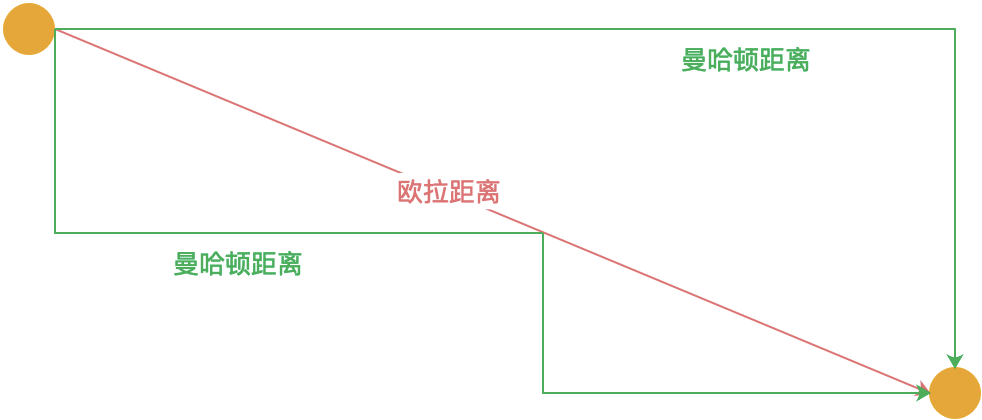

这两种格式很像，其实就是指数不同，所以它们有一个通用的公式：

$$ (\sum_{i=1}^n ( X_i^{(a)} - X_i^{(b)})^p)^{\frac{1}{p}} $$

* p = 1 就是曼哈顿距离
* p = 2 就是欧拉距离

使用不同的距离计算公式，点的分类会导致模型效果也有所不同，而 sklearn中对应的这个距离的超参数就是公式中的p，默认值2（欧拉距离）。


### 1.2. 算法代码

下边是kNN的算法代码完整流程

In [2]:
'''
1）直接导入 sklearn 中的 kNN 算法包
   调用 KNN 分类器
'''
from sklearn.neighbors import KNeighborsClassifier



'''
2）其中 0 代表 “黑皮诺”，1 代表 “赤霞珠” 

实例化：设置参数（算法模型当中需要自行设定或者是默认的算法逻辑和公式中的参数）
'''
clf = KNeighborsClassifier(n_neighbors = 4)



'''
3）训练模型、学习数据：特征矩阵（二维特征方程）、标签（一维）
'''
clf = clf.fit(wine_data.iloc[:,0:2], wine_data.iloc[:,-1])



'''
4）返回预测的标签：通过 predict 接口做预测：传入二维数组
'''
result = clf.predict([[12.8,4.1]])
result

array([0], dtype=int64)

In [3]:
'''
5）对模型进行一个评估，接口 score 返回预测的精准率，[0.0, 1.0]
   需要判断的数据特征，真实标签
'''
score = clf.score([[12.8, 4.1]],[0])
score

1.0

In [4]:
'''
6）预测概率：为了投票！！！！
阀值的划分标准：默认 0.5 为阀值，0.5 表示的是瞎猜
'''
clf.predict_proba([[12.8,4.1]])

array([[0.5, 0.5]])

## 2.算法详解

有监督学习中，算法进一步分为两种：

* 产生规则的积极学习方法（Eager Learner），训练集的训练过程中生成规则可见、且在一定范围内随着训练数据变化而变化的模型。
* 另一类是惰性学习（Lazy Learner），遵循一定的规则进行有监督的判别，但无法根据训练集生成固定模型，执行算法时才运算。

KNN就是一种惰性学习算法。

### 2.1. 原理

惰性算法，主要用于处理分类问题。

1. 首先找出和测试样例属性相对最接近的K个训练样例，称为最近邻（Nearest Neighbor）。
2. 然后查看这些样例都属于何种类别，少数服从多数原则将测试阳历判定为该类别（判定方式为距离测算）。

如果只有两个维度，则表示一个平面，可直接用二维平面来表示。

### 2.2. 算法伪代码

假设数据集中特征向量为`x`，`y`为目标变量，即某阳历的类别，同时数据集仍然可分为测试数据集和训练数据集，一个训练样本为$(x,y)$，训练样本空间为$(x,y) \in D$，一个测试样例为$ z = (x',y')$，具体算法代码执行过程如：

1. 设置算法所需参数，其中$K$是最近邻元素个数，$D$是训练集。
2. `for` 每个测试样例 $z = (x',y')$, `do`
3. 计算 $z$ 和每个训练样例 $(x,y) \in D$的距离 $d(x',x)$。
4. 选择 $z$ 里最近的 $k$ 个训练样例的集合 $D_z \subseteq D$。
5. $ y' = argmax \sum_{(x_i,y_i)} I(v = y_i)$。
6. `end for`

其中 $y'$代表多数表决分类结果，基本计算为：

$$ y' = argmax \sum_ {(x_i,y_i) \subseteq D_z} I ( v = y_i) $$

其中$v$是类别标号，$y_i$是一个最近邻类标号，$I(.)$是指示函数，参数为真返回1，否则返回0，在加权模式中，权重为：

$$ w_i = \frac{1}{d(x',x_i)^2} $$

加权模式的计算结果如：

$$ y' = argmax \sum_ {(x_i,y_i) \subseteq D_z} I ( w_i \times v = y_i) $$

### 2.3. 算法评价

KNN算法特征如下：

* 应用广泛
* 计算效率低，耗费计算资源较大
* 抗噪性比较弱，对噪声数据（异常值）较为敏感
* 模型不稳定，可重复性比较弱
* 需要进行归一化处理

## 3.算法实践

### 3.1. Python实现

#### 3.1.1. 包导入

In [5]:
### 1. 导入必要的包
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

#### 3.1.2. 创建简单数据集

In [6]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [7]:
group, labels = createDataSet()
group, labels

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1]]),
 ['A', 'A', 'B', 'B'])

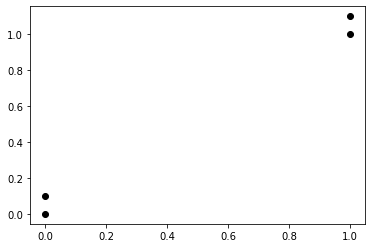

In [8]:
plt.plot(group[:,0],group[:,1],'o',color='black')

#### 3.1.3. 构造分类器

KNN的第三步就是构造一个KNN的分类器，先构造一个容易理解的分类器。

In [9]:
'''
参数含义：
- inX：预测数据集，即需要划分的数据
- dataSet：迅联数据集，二维数组，每一个以为数组都是不包含标签的记录
- labels：迅联数据集的标签
- k：选取最近邻为判别标准的个数
'''
def classify0(inX,dataSet,labels,k):
    
    '''
    数组维度组成的元组，第一个索引为高维数组组成的第一维度的数组个数
    作用于二维时则表示记录数
    '''
    dataSetSize = dataSet.shape[0]
    
    '''
    tile方法将测试数据张成一个行数和训练集行数相同、列数为（1*测试数据列）的二维数组（矩阵），用于
    和输入数据计算距离使用，最后：
    4 x 2 的数组就能和输入数据集执行减法运算（np.array的广播）
    '''
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    
    '''
    同样使用 np.array 的广播功能，计算每个分量的平方
    这里是 ( x1 - x2 ) 的平方
    '''
    sqDiffMat = diffMat**2
    
    '''
    计算每个分量的和，即：训练样本到每个点各分量的平方和
    axis 标识二维数组按每个内嵌数组求和，或矩阵按行求和，返回结果为一个一位数组
    '''
    sqDisttances = sqDiffMat.sum(axis = 1)
    
    '''
    利用广播对数组中的每个元素进行开平方运算，所得结果为 inX 和训练数据集中其他点的距离
    '''
    distances = sqDisttances**0.5
    
    '''
    对距离计算结果执行排序，返回结果为数组升序排序后的各分量的索引，原始数组转秩排序的结果
    '''
    sortedDistIndicies=distances.argsort()
    
    '''
    定义空字典，在使用 python 基础数据格式在进行算法设计时对元素执行计数的常用手段
    需要计数的对象设置为 key，计数对象累积数值为字典中对应的 value
    '''
    classCount = {}
    for i in range(k):
        
        '''
        由于输入的临近元素数量为 k，所以只提取排序后的前 k 个分量
        （排序越靠前则与预测值距离越接近）
        首先将循坏范围设为 0 - 2
        使用 range 函数设置循环范围
        '''
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
        
    '''
    最后，对保存了对应元素出现次数的字典进行排序，排序之前需要将字典转换为可遍历的
    由 key-value 元组组成的数组
    '''
    sortedClassCount = sorted(classCount.items(), key = lambda x:x[1], reverse=True)
    return sortedClassCount[0][0]

In [10]:
classify0([0,0], group, labels, 3)

'B'

### 3.2. 使用高级数据结构进行优化

下边代码使用 NumPy 和 Pandas 来优化 KNN 算法

#### 3.2.1. 生成 DataFrames

DF（DataFrame）是 NumPy 在数组之上封装的更高级的数据结构，实际 Python 数组分析过程中往往充当表结构的角色，后续的数据IO过程中也可以直接使用 DF 读取和导出。

In [11]:
df = pd.DataFrame({'x1': group[:,0], 'x2': group[:,1], 'labels':labels})
df

,x1,x2,labels
0,1.0,1.1,A
1,1.0,1.0,A
2,0.0,0.0,B
3,0.0,0.1,B


上述结果顺序是乱的，为了符合人为的分析习惯，重新处理一下。

In [12]:
df = df.reindex(['x1'] + ['x2'] + ['labels'], axis = 1)
df

,x1,x2,labels
0,1.0,1.1,A
1,1.0,1.0,A
2,0.0,0.0,B
3,0.0,0.1,B


In [13]:
tar = np.array([0,0])
dt = pd.DataFrame(tar, index = ['x1','x2'])
dt = dt.T
dt

,x1,x2
0,0,0


In [14]:
dt1 = dt.reindex(['x1'] + ['x2'] + ['labels'], axis = 1)
dt1

,x1,x2,labels
0,0,0,NaN


#### 3.2.2. 使用 NumPy 优化算法执行

数据集 df 创建完毕后，即可利用 NumPy 数据格式特性优化算法执行流程，首先是计算各点之间的距离，此处需要注意可直接使用 NumPy 的广播特性进行计算，由于 Pandas 是在 NumPy 的 ndarray 上的数据结构，因此也具有广播特性。

In [15]:
df = pd.concat([df,dt], ignore_index = True)
df

,x1,x2,labels
0,1.0,1.1,A
1,1.0,1.0,A
2,0.0,0.0,B
3,0.0,0.1,B
4,0.0,0.0,NaN


In [16]:
dist = list(((df.iloc[:4,:2] - df.iloc[4,:2]) ** 2).sum(1))
dist

[2.21, 2.0, 0.0, 0.010000000000000002]

In [18]:
dist_1 = pd.DataFrame({'dist': dist, 'labels': (df.loc[:, 'labels'])[:4]})
dist_1

,dist,labels
0,2.21,A
1,2.00,A
2,0.00,B
3,0.01,B


In [20]:
dr = dist_1.sort_values(by = 'dist')[:3]
dr

,dist,labels
2,0.00,B
3,0.01,B
1,2.00,A


In [21]:
re = dr.loc[:, 'labels'].value_counts()
re

B    2
A    1
Name: labels, dtype: int64

In [22]:
re.index[0]

'B'

参考下边优化过后的完整分类器的代码，假设输入数据集中最后一列为标签，其余列为特征列，训练集和测试集分开。

In [23]:
def classify0_1(train, test, k):
    n = train.shape[1] - 1
    m = test.shape[0]
    result = []
    for i in range(m):
        dist = list(((train.iloc[:,:n] - test.iloc[i,:n]) ** 2).sum(1))
        dist_1 = pd.DataFrame({'dist': dist, 'labels': (train.iloc[:,n])})
        dr = dist_1.sort_values(by = 'dist')[:k]
        re = dr.loc[:,'labels'].value_counts()
        result.append(re.index[0])
    result = pd.Series(result)
    test['predict'] = result
    return test

In [33]:
group, labels = createDataSet()
train = np.vstack([group, [0,0]])
labels.append('B')

(array([[1. , 1.1],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.1],
        [0. , 0. ]]),
 ['A', 'A', 'B', 'B', 'B'])

In [34]:
train = pd.DataFrame({'x1': train[:,0], 'x2': train[:,1], 'labels': labels})
train = train.reindex(['x1'] + ['x2'] + ['labels'], axis = 1)
p1 = [1,2]
p2 = [0,1]
test = pd.DataFrame({'x1':p1, 'x2':p2})
result = classify0_1(train,test,3)
result

,x1,x2,predict
0,1,0,B
1,2,1,A


In [35]:
result.columns = ['x1', 'x2', 'labels']
result

,x1,x2,labels
0,1,0,B
1,2,1,A


In [36]:
input = pd.concat([train, result], ignore_index = True)
input

,x1,x2,labels
0,1.0,1.1,A
1,1.0,1.0,A
2,0.0,0.0,B
3,0.0,0.1,B
4,0.0,0.0,B
5,1.0,0.0,B
6,2.0,1.0,A


In [37]:
input['Ind1'] = 1
for i in range(input.shape[0]):
    if(input.iloc[i,2] == 'B'):
        input.iloc[i,3] = 0
input['Ind2'] = [1,1,1,1,1,0.5,0.5]
input

,x1,x2,labels,Ind1,Ind2
0,1.0,1.1,A,1,1.0
1,1.0,1.0,A,1,1.0
2,0.0,0.0,B,0,1.0
3,0.0,0.1,B,0,1.0
4,0.0,0.0,B,0,1.0
5,1.0,0.0,B,0,0.5
6,2.0,1.0,A,1,0.5


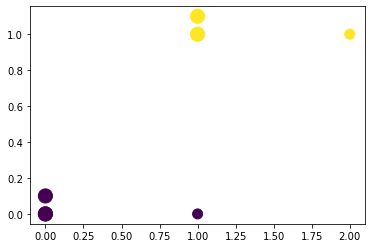

In [38]:
plt.scatter(input.iloc[:,0], input.iloc[:,1], s= 200 * input.iloc[:,4], c = input.iloc[:,3])

In [39]:
# 绘图函数
def nearestPoint(train, result):
    m = train.shape[0]
    n = result.shape[0]
    uq = train.iloc[:,-1].unique()
    k = uq.shape[0]
    ind1 = pd.Series(index = range(m+n))
    ind2 = pd.Series(index = range(m+n))
    ind2[:m] = 1
    ind2[m:] = 2
    if(train.shape[1] == result.shape[1]):
        result.columns = train.columns
        input = pd.concat([train,result], ignore_index = True)
        for i in range(k):
            ind1[input.loc[:, 'labels'] == uq[i]] = i+1
        output = pd.concat([input, ind1, ind2], axis = 1)
    plt.scatter(output.iloc[:,0], output.iloc[:,1], s = 200*output.iloc[:,-1], c = output.iloc[:,-2])
    return output
    

C:\HPE\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
C:\HPE\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,x1,x2,labels,0,1
0,1.0,1.1,A,1.0,1.0
1,1.0,1.0,A,1.0,1.0
2,0.0,0.0,B,2.0,1.0
3,0.0,0.1,B,2.0,1.0
4,0.0,0.0,B,2.0,1.0
5,1.0,0.0,B,2.0,2.0
6,2.0,1.0,A,1.0,2.0


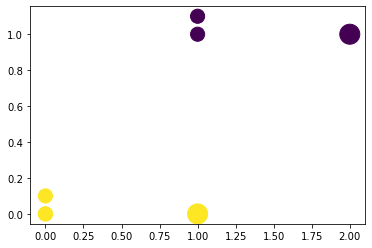

In [40]:
output = nearestPoint(train, result)
output

#### 3.2.3. 读取外部数据集执行算法

（参考笔记）


### 3.3. 模型完善

上述KNN代码需要完善的地方：

* 模型辅助函数
* 模型评估指标
* 模型优化方法
* 学习曲线
* 交叉验证


#### 3.3.1. 归一化方法

**0-1 标准化**

最简单的标准化方法，遍历 feature vector 里的每一个数据，将Max和Min记录下来，并将它作为基数进行数据的归一化处理，基本公式：

$$x_{normalization} = \frac{x - Min}{Max - Min}$$

In [41]:
def MaxMinNormalization(dataSet):
    maxDf = dataSet.max()
    minDf = dataSet.min()
    normSet = (dataSet - minDf) / (maxDf - minDf)
    return normSet
dfTest = pd.DataFrame({'X1':[1,2,3], 'X2':[2,7,8]})
dfTest

,X1,X2
0,1,2
1,2,7
2,3,8


In [43]:
dfTest.min()

X1    1
X2    2
dtype: int64

In [44]:
dfTest.max(1)

0    2
1    7
2    8
dtype: int64

In [45]:
MaxMinNormalization(dfTest)

,X1,X2
0,0.0,0.000000
1,0.5,0.833333
2,1.0,1.000000


**Z-score标准化**

Z-score 标准化利用原始数据均值（Mean）和标准差（Standard Deviation）进行数据的标准化。经过处理的数据符合标准正态分布，借此完成数据空间压缩，从而消除量纲的影响，基本公式为：

$$x_{normalization}=\frac{x - \mu}{\sigma}$$

In [46]:
def Z_ScoreNormalization(dataSet):
    stdDf = dataSet.std()
    meanDf = dataSet.mean()
    normSet = (dataSet - meanDf) / stdDf
    return normSet

**Sigmoid 压缩法**

Sigmoid函数是一个具有S形曲线的函数，也是良好的阀值函数，在（0, 0.5）中心对称，这一点附近有比较大的斜率，数据去向正无穷和负无穷时，映射出来的值就会无限趋近于1和0，该方法在阀值分割上也有很不错的表现，根据公式的改变，就可以改变分割阀值，该函数是逻辑回归中的修正函数，也是神经网络中的技法函数：

$$x_{normalization}=\frac{1}{1+e^{-x}}$$

In [47]:
def sigmodNormalization(dataSet):
    normSet = 1 / (1 + np.exp(-dataSet))
    return normSet
sigmodNormalization(dfTest)

,X1,X2
0,0.731059,0.880797
1,0.880797,0.999089
2,0.952574,0.999665


#### 3.3.2. 模型评估指标

**多分类问题的模型准确率 accuracy**：准确率计算比较简单，就是预测正确的样例数占测试集比例，利用 DF 高级数据结构可非常方便计算，假设：最后一列为预测结果，倒数第二列为实际类别。

In [49]:
def accuracyCalculation(dataSet):
    m = dataSet.shape[0]
    res = (dataSet.iloc[:,-1] == dataSet.iloc[:,-2]).value_counts()
    acc = res.loc[True] / m
    print("Model accuracy is %f" & acc)
    return acc
res = (result.iloc[:,-1] == result.iloc[:,-2]).value_counts()
res

False    2
dtype: int64